In [8]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
%matplotlib inline

df = pd.read_csv("imports-85.DATA", header = None) #header = None if we don't specify the parameters of each colm
headers = ["symboling","normalized-losses","make","fuel-type","aspiration","num-of-doors","body-style",
          "drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type",
          "num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
          "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

We want to know what are the characteristics that have the most impact on the car price
1st - When you begin to analyze data, it's important to first explore your data before you spend time building complicated models.

In [5]:
df["drive-wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64

In [41]:
#We check the types of the data, we replace the wrong values and the correct type
#FORMAT DATA

df.replace("?", np.nan, inplace = True)
df["price"] =  df["price"].astype("float")
df['horsepower'] = df['horsepower'].astype("float")
df.dropna(subset=["price"],axis=0,inplace=True)
df.dropna(subset=["horsepower"],axis=0,inplace=True)

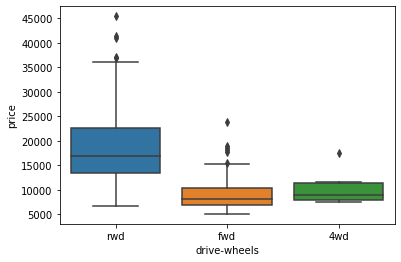

In [17]:
# Engine size as potential predictor variable of price
sns.boxplot(x="drive-wheels", y="price", data=df)

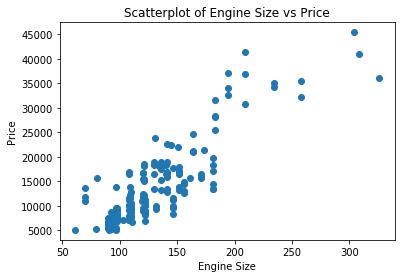

In [26]:
y = df["price"]
x = df["engine-size"]
plt.scatter(x,y)

plt.title("Scatterplot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

In [22]:
df_test = df[['drive-wheels','body-style','price']]
df_grp = df_test.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [24]:
df_pivot = df_grp.pivot(index='drive-wheels',columns='body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

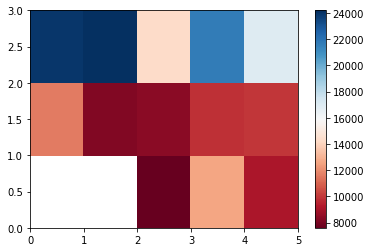

In [28]:
plt.pcolor(df_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

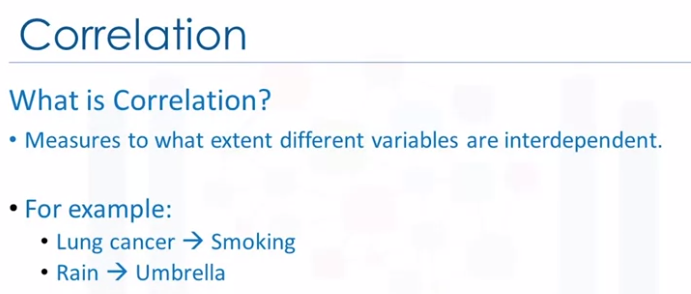

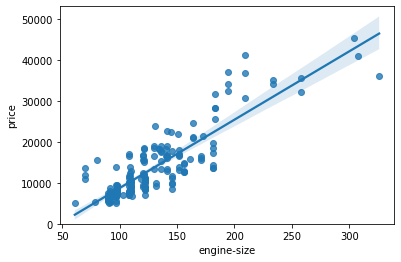

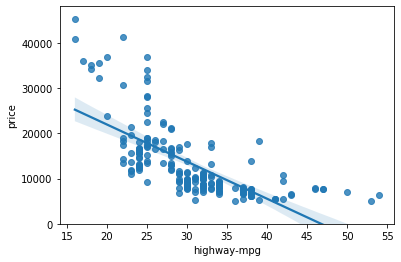

In [33]:
#We'll check the correlation between engine-size and price
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)
plt.show()

sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)
plt.show()

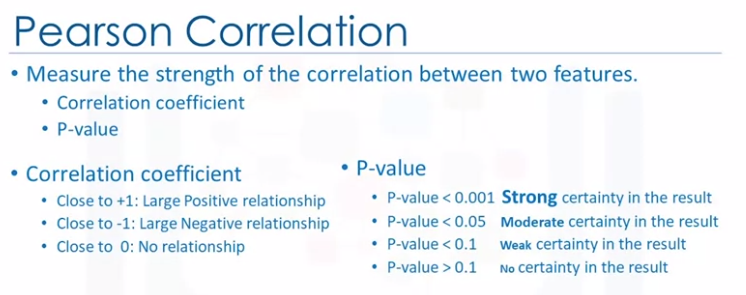

In [45]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['horsepower'],df['price'])
print('Pearson correlation: '+str(pearson_coef)+' P_value: '+str(p_value))

Pearson correlation: 0.8105330821322063 P_value: 1.1891278276946466e-47


So considering the results obtained from the pearson correlation we know that:
There is a large positive relationship between the horsepowe and their price 
and we can be certan about the result.